# What is Time Series?

- To understand the pattern of trends, seasonality and cyclic behaviour


**Key Components**
- Trends : Long term increase or decrease in the data

- Seasonality: Regular pattern on a basis of fixed period (days, weeks, year)

- Cyclical: Repeating pattern but without any fixed period

- Noise: Variations


**Models**

-  Classical Statistical Models

1. AutoRegrssive Model (AR Model): Past value to predict the future

2. Moving Average(MA) Model: Past value with noise

3. AutoRegressive Moving Average (ARMA) Model: AR + MA, stationary data

4. AutoRegressive Integrated Moving Average(ARIMA) Model: Streaming Data -> Batch data for future prediction

5. SARIMA (Seasonal ARIMA) Model: Fixed Period


- Machine Learning Models

1. Linear Regression: Simple

2. Decision Tree and Random Forest: Involve Lag features (1, 7, 10)

3. XGBoost/LightBoost: Lag + MA as Input to predict Time series


- Deep Learning Models

1. RNN (Recurent Neural Network): Memory-> stores past information -> Small Data set

2. LSTM (Long Short Term Memory): Large Data -> Forget Gate -> Complex Data

3. GRU (Gated Recurrent Unit): LSTM but simpler

4. Transformers: Combines ML with DL for Time Series Predictions

# Steps to Follow

1. EDA : Missing values, general time series

2. Stationarity Check: Augmented Duller Test (stationary or not)

3. Decomposition: Key components

4. Model Building

5. Validation

6. Forecasting: Future predictions


https://www.kluniversity.in/arp/uploads/2093.pdf


https://preset.io/blog/time-series-forecasting-a-complete-guide/

https://medium.com/@wainaina.pierre/the-complete-guide-to-time-series-forecasting-models-ef9c8cd40037


https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

# Toronto Climate Trends: A Time Series Analysis from 1937 to 2025


**"How has Toronto's weather changed over the past century, and what trends or anomalies can help us understand the evolving climate patterns for future urban planning and public preparedness?"**

This project aims to analyze long-term weather data in Toronto from November 1937 to July 2025, focusing on temperature, precipitation, snowfall, and wind patterns. Students will perform exploratory data analysis, detect long-term and seasonal trends, uncover weather anomalies, and create insightful visualizations. The objective is to identify meaningful climate patterns and provide a data-driven narrative that can inform environmental planning, policy-making, and sustainability strategies.

In [39]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

In [40]:
# Step 2: Load the Data
df = pd.read_csv('weatherstats_toronto_daily.csv')


df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10336\4032986422.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherstats_toronto_daily.csv')


- Converts the date column to datetime format.

- Sets date as the index — crucial for time-series operations.

- Sorts the index chronologically.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32036 entries, 1937-10-31 to 2025-07-16
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   max_temperature                31906 non-null  float64
 1   avg_hourly_temperature         26495 non-null  float64
 2   avg_temperature                31897 non-null  float64
 3   min_temperature                31900 non-null  float64
 4   max_humidex                    6968 non-null   float64
 5   min_windchill                  9783 non-null   float64
 6   max_relative_humidity          26495 non-null  float64
 7   avg_hourly_relative_humidity   26495 non-null  float64
 8   avg_relative_humidity          26495 non-null  float64
 9   min_relative_humidity          26495 non-null  float64
 10  max_dew_point                  26495 non-null  float64
 11  avg_hourly_dew_point           26495 non-null  float64
 12  avg_dew_point                

In [42]:
df.head(5)

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,avg_dew_point,min_dew_point,max_wind_speed,avg_hourly_wind_speed,avg_wind_speed,min_wind_speed,max_wind_gust,wind_gust_dir_10s,max_pressure_sea,avg_hourly_pressure_sea,avg_pressure_sea,min_pressure_sea,max_pressure_station,avg_hourly_pressure_station,avg_pressure_station,min_pressure_station,max_visibility,avg_hourly_visibility,avg_visibility,min_visibility,max_health_index,avg_hourly_health_index,avg_health_index,min_health_index,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,snow_on_ground,sunrise_hhmm,sunrise_unixtime,sunrise_f,sunset_hhmm,sunset_unixtime,sunset_f,daylight,min_uv_forecast,max_uv_forecast,min_high_temperature_forecast,max_high_temperature_forecast,min_low_temperature_forecast,max_low_temperature_forecast,solar_radiation,max_cloud_cover_4,avg_hourly_cloud_cover_4,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1937-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-01,15.0,NaN,5.55,-3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-02,18.3,NaN,9.45,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,0.0,4.5,2.5,0.0,0.8,0.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-03,14.4,NaN,6.10,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,0.0,1.1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-04,9.4,NaN,5.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Step 3: Dataset Overview
print("Shape of the dataset:", df.shape)

Shape of the dataset: (32036, 71)


In [44]:
print("\nColumns:", df.columns.tolist())


Columns: ['max_temperature', 'avg_hourly_temperature', 'avg_temperature', 'min_temperature', 'max_humidex', 'min_windchill', 'max_relative_humidity', 'avg_hourly_relative_humidity', 'avg_relative_humidity', 'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point', 'avg_dew_point', 'min_dew_point', 'max_wind_speed', 'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_wind_gust', 'wind_gust_dir_10s', 'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea', 'min_pressure_sea', 'max_pressure_station', 'avg_hourly_pressure_station', 'avg_pressure_station', 'min_pressure_station', 'max_visibility', 'avg_hourly_visibility', 'avg_visibility', 'min_visibility', 'max_health_index', 'avg_hourly_health_index', 'avg_health_index', 'min_health_index', 'heatdegdays', 'cooldegdays', 'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation', 'rain', 'snow', 'snow_on_ground', 'sunrise_hhmm', 'sunrise_unixtime', 'sunrise_f', 'sunset_hhmm', 'sunset_unixtime', 'su

In [45]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        max_temperature  avg_hourly_temperature  avg_temperature  \
count     31906.000000            26495.000000     31897.000000   
mean         12.926468                8.210708         7.965333   
std          11.552343               10.570432        10.682003   
min         -21.000000              -24.120000       -24.700000   
25%           3.100000                0.140000        -0.190000   
50%          13.300000                8.400000         8.290000   
75%          23.200000               17.500000        17.200000   
max          38.300000               31.700000        31.950000   

       min_temperature  max_humidex  min_windchill  max_relative_humidity  \
count     31900.000000  6968.000000    9783.000000           26495.000000   
mean          3.003583    31.162026     -13.212511              88.799132   
std          10.160912     4.485117       7.504481               8.882725   
min         -31.300000    25.000000     -45.000000              38

In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Missing values:
 avg_hourly_cloud_cover_4         32036
avg_cloud_cover_4                32036
max_cloud_cover_4                32036
solar_radiation                  32036
min_cloud_cover_4                32036
avg_cloud_cover_10               31799
min_cloud_cover_10               31799
max_cloud_cover_10               31799
avg_hourly_cloud_cover_10        31799
avg_health_index                 31780
max_health_index                 31780
min_health_index                 31780
avg_hourly_health_index          31780
max_uv_forecast                  28495
min_uv_forecast                  28495
sunrise_unixtime                 27821
sunset_unixtime                  27821
sunrise_f                        27821
sunset_hhmm                      27821
max_high_temperature_forecast    27821
max_low_temperature_forecast     27821
min_low_temperature_forecast     27821
sunrise_hhmm                     27821
daylight                         27821
min_high_temperature_forecast    27821
sunset_

In [47]:
#Calculate the Missing percentage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_percentage = df.isnull().mean() * 100

#Display the sorted columns
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)

avg_hourly_cloud_cover_4         100.000000
avg_cloud_cover_4                100.000000
max_cloud_cover_4                100.000000
solar_radiation                  100.000000
min_cloud_cover_4                100.000000
avg_cloud_cover_10                99.260207
min_cloud_cover_10                99.260207
max_cloud_cover_10                99.260207
avg_hourly_cloud_cover_10         99.260207
avg_health_index                  99.200899
max_health_index                  99.200899
min_health_index                  99.200899
avg_hourly_health_index           99.200899
max_uv_forecast                   88.946810
min_uv_forecast                   88.946810
sunrise_unixtime                  86.842927
sunset_unixtime                   86.842927
sunrise_f                         86.842927
sunset_hhmm                       86.842927
max_high_temperature_forecast     86.842927
max_low_temperature_forecast      86.842927
min_low_temperature_forecast      86.842927
sunrise_hhmm                    

In [48]:
'''

# Step 4: Missing Values Handling
df.fillna(method='ffill', inplace=True)  # Forward-fill
df.fillna(method='bfill', inplace=True)  # Backward-fill

'''

"\n\n# Step 4: Missing Values Handling\ndf.fillna(method='ffill', inplace=True)  # Forward-fill\ndf.fillna(method='bfill', inplace=True)  # Backward-fill\n\n"

In [49]:
# Step 4: Missing Values Handling

valid_cols = df.columns[df.isnull().mean() <= 0.9]

df[valid_cols] = df[valid_cols].fillna(method='ffill').fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_10336\3113668396.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[valid_cols] = df[valid_cols].fillna(method='ffill').fillna(method='bfill')


In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_percentage = df.isnull().mean() * 100

#Display the sorted columns
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)

avg_hourly_cloud_cover_4         100.000000
avg_cloud_cover_4                100.000000
max_cloud_cover_4                100.000000
solar_radiation                  100.000000
min_cloud_cover_4                100.000000
avg_cloud_cover_10                99.260207
min_cloud_cover_10                99.260207
max_cloud_cover_10                99.260207
avg_hourly_cloud_cover_10         99.260207
avg_health_index                  99.200899
max_health_index                  99.200899
min_health_index                  99.200899
avg_hourly_health_index           99.200899
max_temperature                    0.000000
avg_hourly_temperature             0.000000
max_relative_humidity              0.000000
min_windchill                      0.000000
max_humidex                        0.000000
min_temperature                    0.000000
avg_temperature                    0.000000
avg_hourly_relative_humidity       0.000000
min_relative_humidity              0.000000
avg_relative_humidity           

In [51]:
'''

## Drop column with 100%
df.dropna(axis=1, how='all', inplace=True)

'''

"\n\n## Drop column with 100%\ndf.dropna(axis=1, how='all', inplace=True)\n\n"

In [52]:
'''

## Drop high missing values 90%+
high_missing = df.columns[df.isnull().mean() > 0.9]
df.drop(high_missing, inplace=True)

'''

'\n\n## Drop high missing values 90%+\nhigh_missing = df.columns[df.isnull().mean() > 0.9]\ndf.drop(high_missing, inplace=True)\n\n'

Fills missing values using forward fill and backward fill, a smart technique for time-series.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32036 entries, 1937-10-31 to 2025-07-16
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   max_temperature                32036 non-null  float64
 1   avg_hourly_temperature         32036 non-null  float64
 2   avg_temperature                32036 non-null  float64
 3   min_temperature                32036 non-null  float64
 4   max_humidex                    32036 non-null  float64
 5   min_windchill                  32036 non-null  float64
 6   max_relative_humidity          32036 non-null  float64
 7   avg_hourly_relative_humidity   32036 non-null  float64
 8   avg_relative_humidity          32036 non-null  float64
 9   min_relative_humidity          32036 non-null  float64
 10  max_dew_point                  32036 non-null  float64
 11  avg_hourly_dew_point           32036 non-null  float64
 12  avg_dew_point                

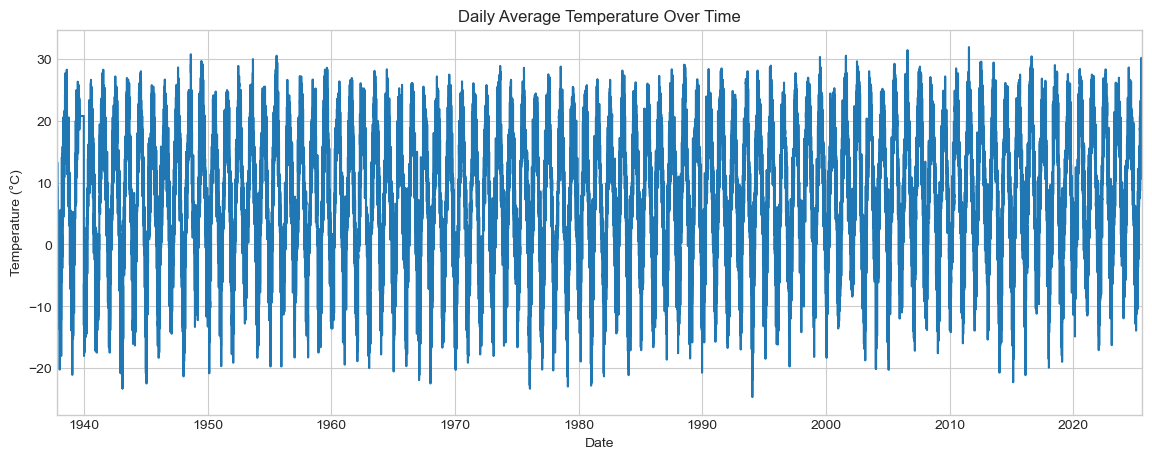

In [54]:
# Step 5: Line Plot – Temperature Over Time
plt.figure(figsize=(14, 5))
df['avg_temperature'].plot(title='Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

Visualizes how the average temperature has changed over time.

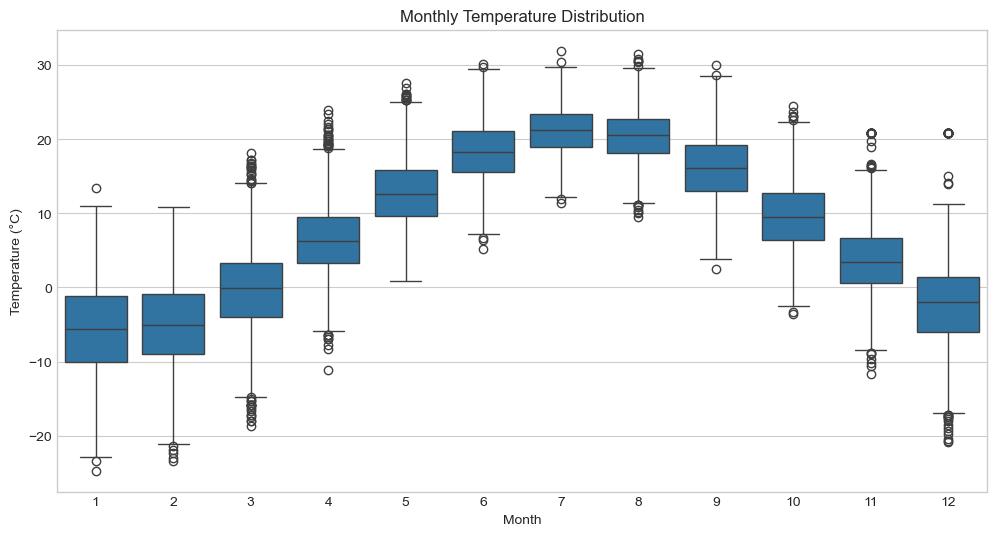

In [55]:
# Step 6: Boxplot – Monthly Temperature Distribution
df['month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='avg_temperature', data=df)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

- January, February, and December have the lowest median temperatures, often below 0°C.

- Outliers are common in winter months, showing extreme cold days below -20°C.

- Temperatures gradually rise from March to May, indicating the transition from winter to spring.

- June, July, and August show the highest median temperatures, around 20–25°C.

- Summer months have a narrower range, indicating more stable weather.

- Temperatures start decreasing again from September to November.

- September still has relatively high temperatures, but a sharp drop is seen by November.

- The box widths are largest in transitional months (Mar, Apr, Oct), reflecting higher variability.

- Clear seasonal patterns are visible, highlighting Toronto’s strong climate seasonality.

- Temperature extremes (outliers) are more frequent in winter than in summer.

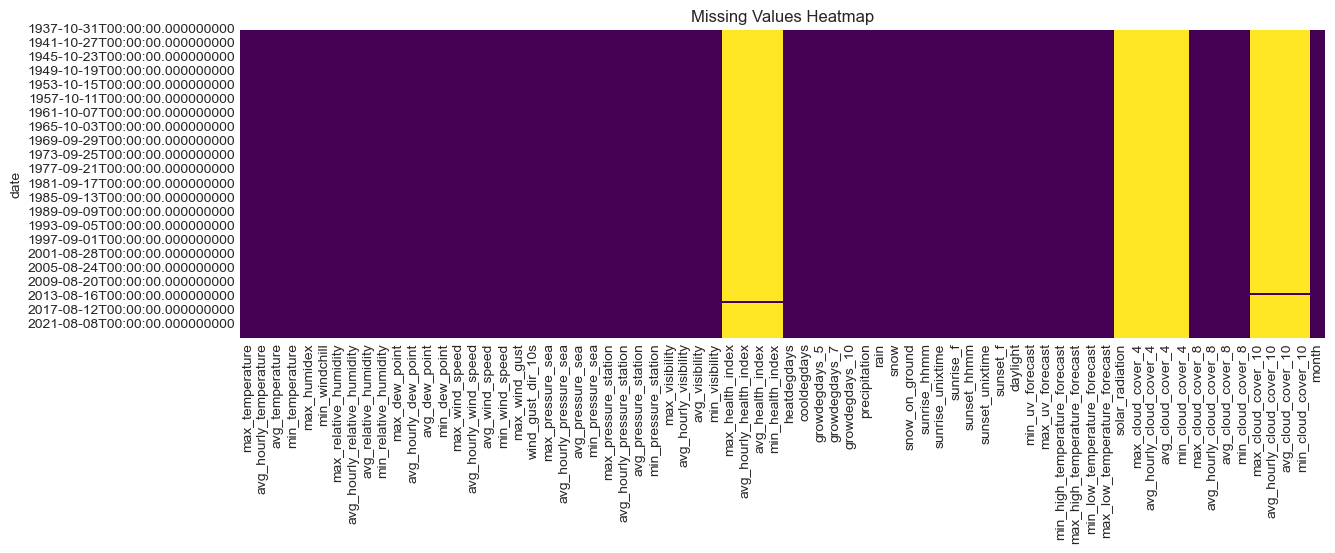

In [56]:
# Step 7: Heatmap – Missing Values
plt.figure(figsize=(14, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

- Most columns have complete data across the entire time range, indicating a well-maintained dataset.

- Significant missing data is observed in the solar_radiation and cloud_cover-related columns.

- Missing values are consistent across time for the affected columns, suggesting data was never recorded rather than lost.

- Dates with missing values appear intermittently across decades, but only for specific features.

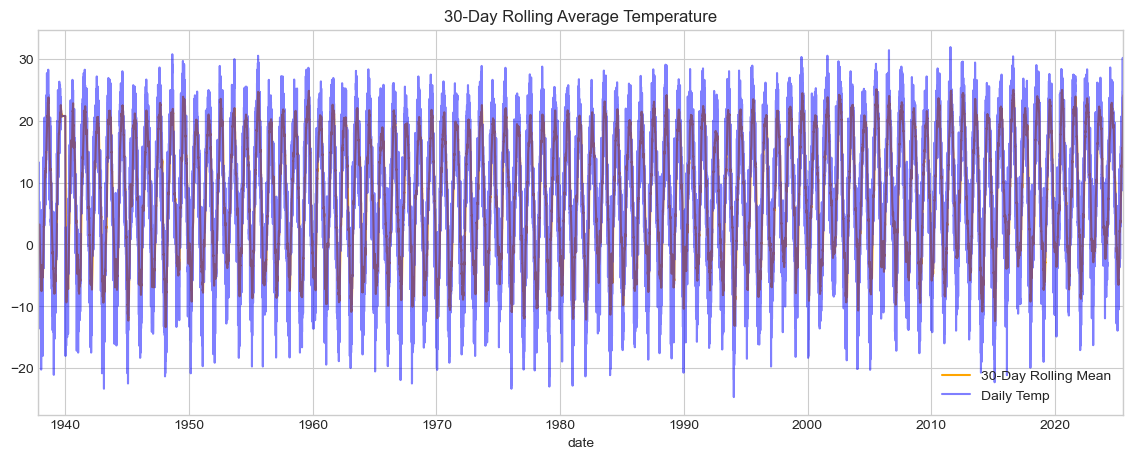

In [57]:
# Step 8: Rolling Average (Moving)– 30-day Rolling Mean
plt.figure(figsize=(14, 5))
df['avg_temperature'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', color='orange')
df['avg_temperature'].plot(alpha=0.5, label='Daily Temp', color='blue')
plt.title('30-Day Rolling Average Temperature')
plt.legend()
plt.show()

- The temperature exhibits a clear and consistent seasonal pattern across the years.

- Peaks occur mid-year (summer), while dips happen at year-end and beginning (winter).

- The 30-day rolling average smooths the daily fluctuations and highlights long-term trends.

- No major long-term warming or cooling trend is visually evident, suggesting climate stability in average values.

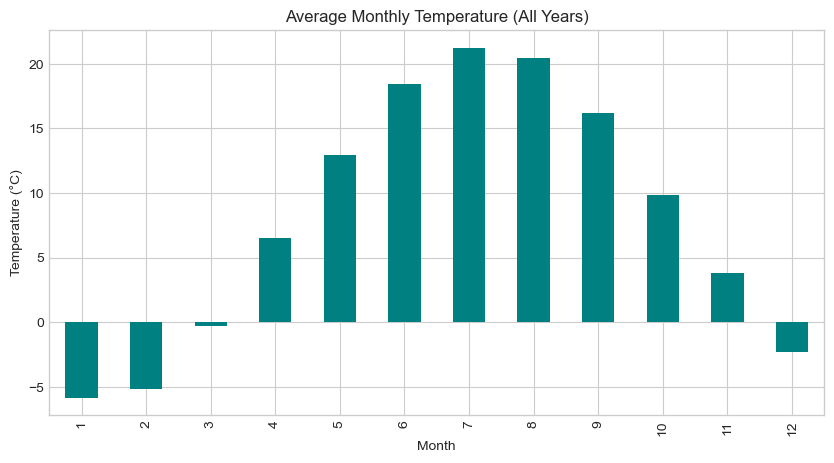

In [58]:
# Step 9: Seasonal Patterns – Average Monthly Temp (Across All Years)
monthly_avg_temp = df.groupby(df.index.month)['avg_temperature'].mean()
plt.figure(figsize=(10, 5))
monthly_avg_temp.plot(kind='bar', color='teal')
plt.title('Average Monthly Temperature (All Years)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

- July records the highest average temperature (~21°C), confirming it as the hottest month.

- January is the coldest month with average temperatures below -5°C.

- A clear seasonal temperature trend is observed: gradual warming from March to July, then cooling from August to December.

- The sharp temperature difference between summer and winter months indicates a temperate continental climate.

# Trend Analysis, Seasonality & Anomalies Grouping by month/year

In [59]:
# Required Libraries for Class 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [75]:
# Load dataset
df = pd.read_csv('weatherstats_toronto_daily.csv', low_memory=False)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [76]:
# Grouping by Month and Year
# ------------------------
monthly_avg = df['avg_temperature'].resample('ME').mean()
yearly_avg = df['avg_temperature'].resample('YE').mean()

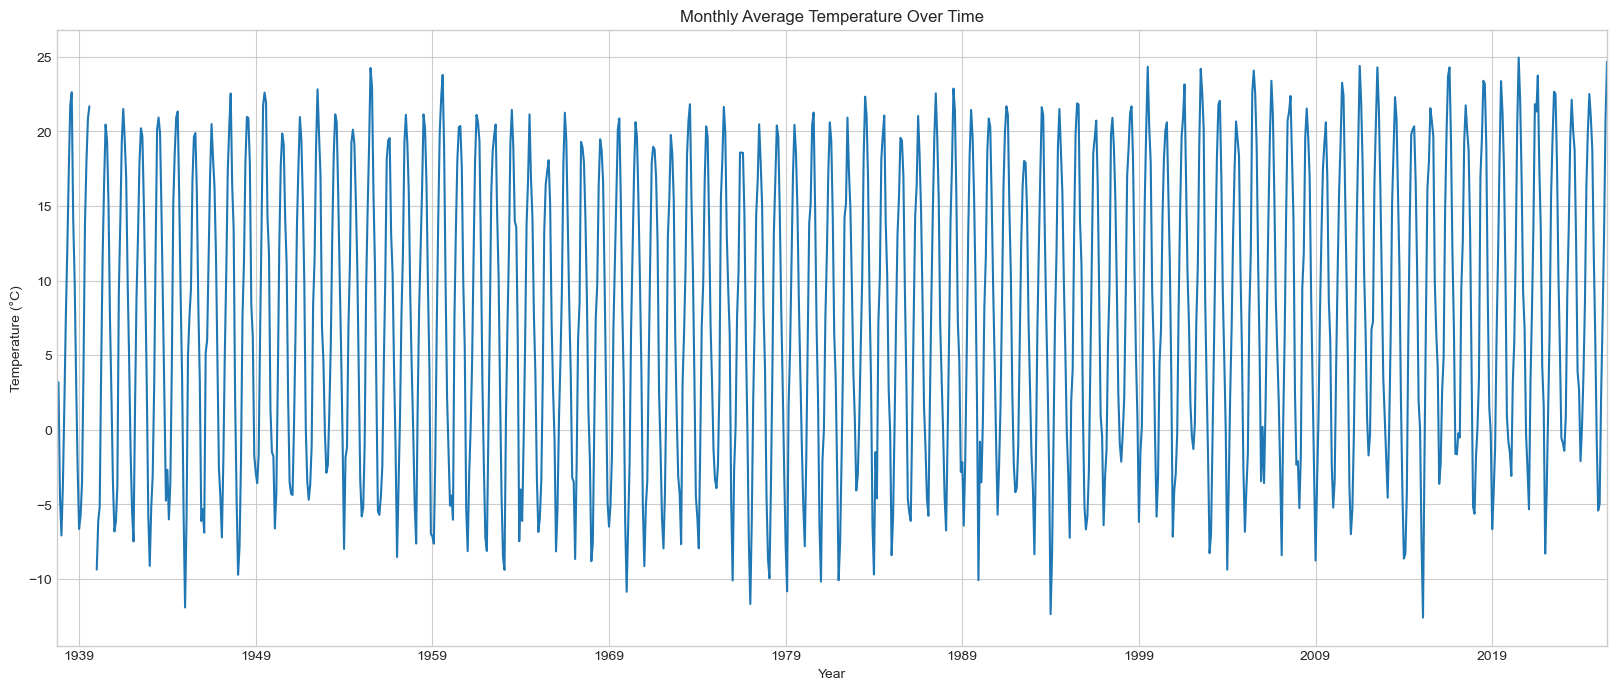

In [62]:
# Plotting Monthly Average Temperature
plt.figure(figsize=(20, 8))
monthly_avg.plot()
plt.title("Monthly Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

- Strong seasonality is evident with a recurring annual temperature cycle from 1937 to 2025.

- Summer peaks and winter troughs appear regularly and predictably across decades.

- Slight upward trend in peak summer temperatures is visible post-2000, indicating possible climate warming.

- The range between summer highs and winter lows has remained relatively stable over time.

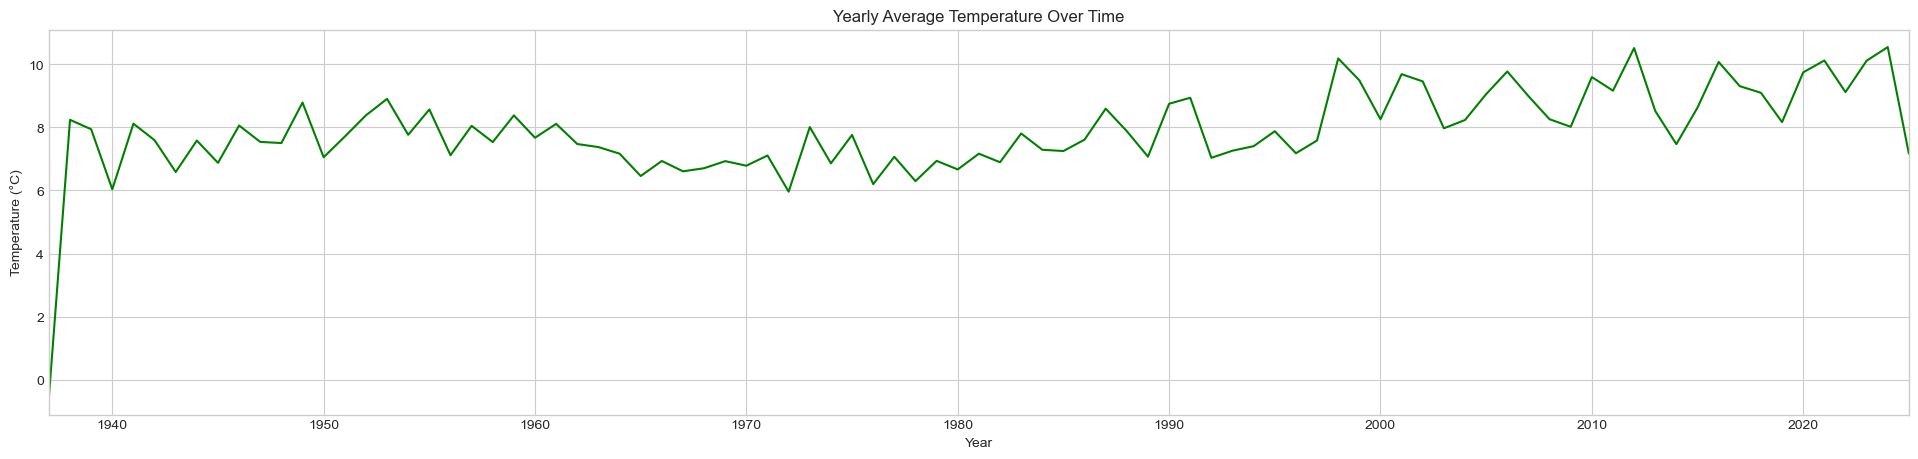

In [63]:
# Plotting Yearly Average Temperature
plt.figure(figsize=(24, 5))
yearly_avg.plot(color='green')
plt.title("Yearly Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

- Yearly average temperature shows a clear upward trend from the 1970s onwards.

- The rise is more noticeable post-1990, supporting evidence of long-term warming.

- Variability exists, but the overall trajectory is increasing.

- Recent decades consistently record higher annual averages than earlier years.

<Figure size 2200x500 with 0 Axes>

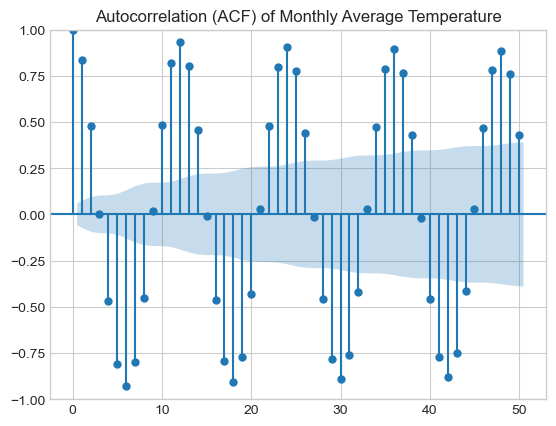

In [64]:
# ACF and PACF
# ------------------------
plt.figure(figsize=(22, 5))
plot_acf(monthly_avg.dropna(), lags=50)
plt.title("Autocorrelation (ACF) of Monthly Average Temperature")
plt.show()

- ACF (Autocorrelation Function) shows how the current value of a time series is related to its past values. It measures the correlation between observations at different lags.
→ Example: A high autocorrelation at lag 12 means the current month's temperature is strongly correlated with the temperature 12 months ago (seasonality).

- PACF (Partial Autocorrelation Function) shows the correlation between observations at a given lag after removing the effects of shorter lags.
→ Example: PACF at lag 12 shows the pure effect of the value 12 months ago on the current value, removing the influence of lag 1 to 11.

**They are used to:**
- Detect seasonality and trend patterns
- Determine order parameters for models like ARIMA/SARIMA:
- Use PACF to identify the AR (Auto-Regressive) order.
- Use ACF to identify the MA (Moving Average) order.




- Strong positive spikes at lags 12, 24, 36, etc. indicate clear annual seasonality in temperature data.

- Significant negative correlations at intermediate lags (e.g., 6, 18, 30) suggest alternating temperature patterns between seasons.

- Gradual decay in autocorrelation confirms a persistent seasonal component rather than a purely random process.

- The ACF pattern supports time series modeling approaches like SARIMA that account for seasonality.

<Figure size 1200x500 with 0 Axes>

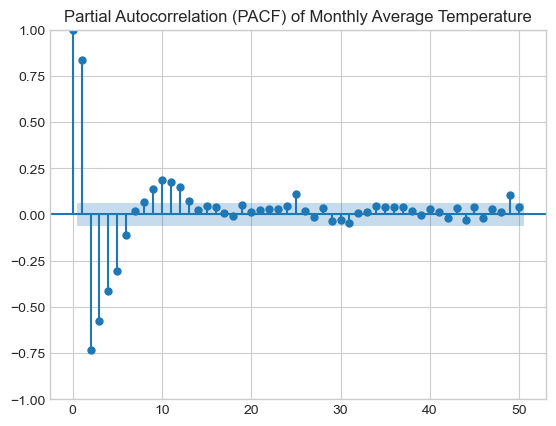

In [65]:
plt.figure(figsize=(12, 5))
plot_pacf(monthly_avg.dropna(), lags=50)
plt.title("Partial Autocorrelation (PACF) of Monthly Average Temperature")
plt.show()

- ACF shows strong autocorrelation at lag 12, 24, 36, indicating yearly seasonality in temperature data.

- ACF gradually decays, which is typical of seasonal patterns and suggests a mix of autoregressive (AR) and moving average (MA) components.

- PACF has a sharp cutoff after lag 2 or 3, implying only the first few lags have a strong direct influence on current values.

- Significant spikes in PACF around lag 12 may reflect a yearly seasonal effect that persists even after controlling for shorter lags.

- Both plots confirm the presence of seasonality and potential trend, important for choosing SARIMA over simple ARIMA.

- The consistent spike pattern in ACF and quick drop in PACF suggest the model may benefit from AR terms (based on PACF) and MA terms (based on ACF).

- The regular ACF peaks align with temperature's cyclic nature, likely due to repeating annual climate cycles.

<Figure size 1400x800 with 0 Axes>

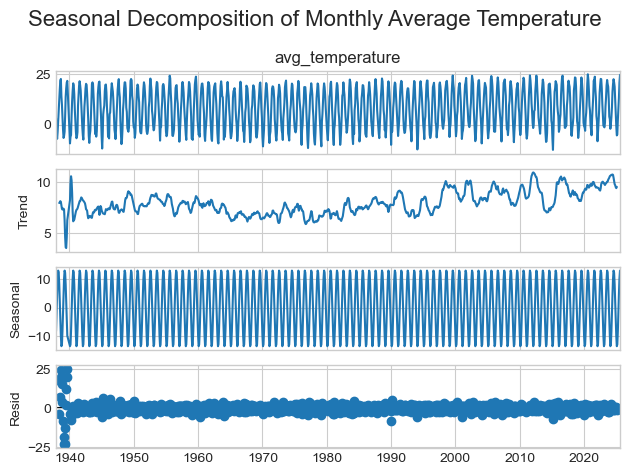

In [66]:
# Seasonal Decomposition
# ------------------------
decomposition = seasonal_decompose(monthly_avg.dropna(), model='additive', period=12)

plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Monthly Average Temperature", fontsize=16)
plt.tight_layout()
plt.show()

- The observed temperature series shows strong repeating patterns, confirming seasonal behavior.

- The trend component shows a gradual increase in average temperature from the 1940s to recent years, suggesting long-term warming.

- The seasonal component is highly regular and periodic, indicating consistent yearly fluctuations in temperature.

- The seasonality pattern remains stable over the decades, reflecting consistent seasonal climate cycles.

- The residual component is relatively small and random, indicating the model captures most of the signal with trend and seasonality.

- Some large residuals in early years (pre-1950) suggest possible anomalies or data variability in that period.

- Overall, the decomposition validates the presence of both long-term trend and strong seasonality, supporting the use of seasonal time series models.

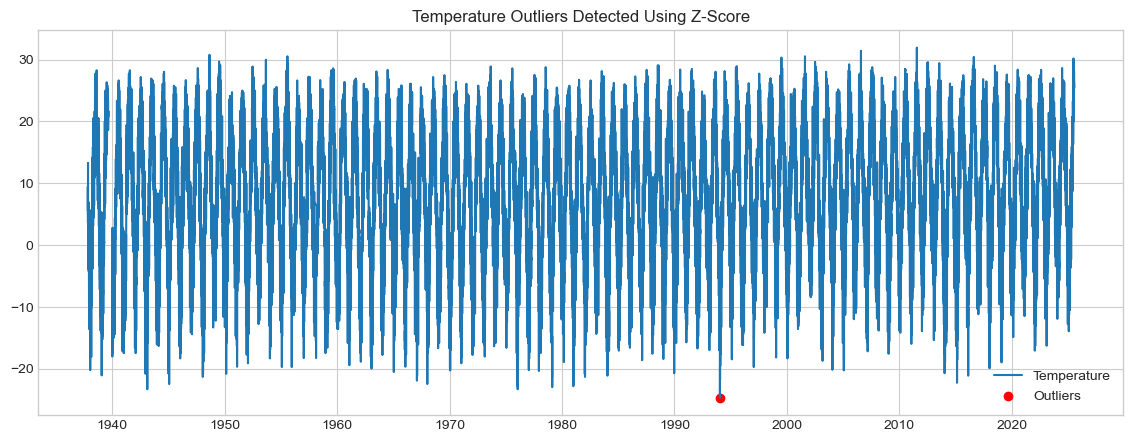

In [67]:
# Outlier Detection (Z-score Method)
# ------------------------
df['z_score'] = (df['avg_temperature'] - df['avg_temperature'].mean()) / df['avg_temperature'].std()
outliers = df[np.abs(df['z_score']) > 3]

plt.figure(figsize=(14, 5))
plt.plot(df['avg_temperature'], label='Temperature')
plt.scatter(outliers.index, outliers['avg_temperature'], color='red', label='Outliers')
plt.title('Temperature Outliers Detected Using Z-Score')
plt.legend()
plt.show()

## Explain code:

- Z-score formula: Measures how many standard deviations a data point is from the mean. Adds a new column z_score to the DataFrame, where each temperature is standardized.
- Filters the dataset to find points with a Z-score greater than 3 or less than -3, which are considered statistical outliers (beyond 99.7% of normal distribution if data is Gaussian).
- The graph will show all temperature values over time as a line. Points far from the norm (extreme heat or cold values) are highlighted in red as outliers.

C:\Users\user\AppData\Local\Temp\ipykernel_10336\1216331141.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_avg.index.astype(str), y=decade_avg.values, palette='coolwarm')


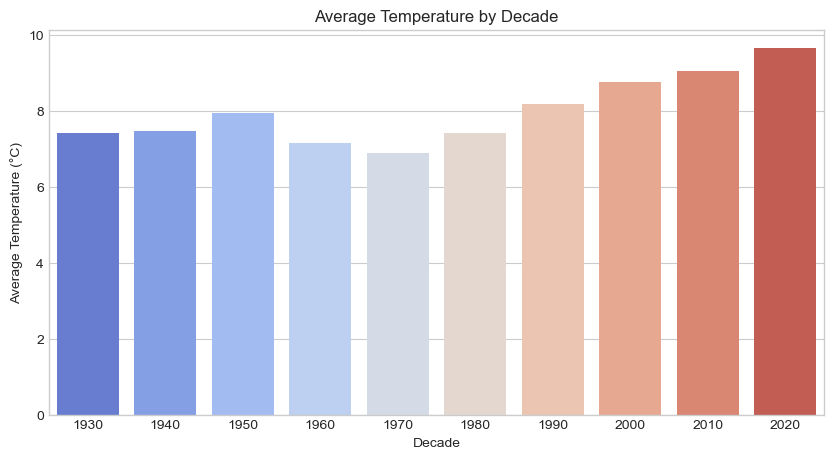

In [68]:
# Decade-Level Comparison
# ------------------------
df['year'] = df.index.year
df['decade'] = (df['year'] // 10) * 10
decade_avg = df.groupby('decade')['avg_temperature'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_avg.index.astype(str), y=decade_avg.values, palette='coolwarm')
plt.title("Average Temperature by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°C)")
plt.show()

### Forcasting and Storytelling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prophet as Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Corrected: mean_squared_error instead of mean_square_error

In [69]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_avg.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic: -5.109611790021653
p-value: 1.3408345231014106e-05
Critical Value (1%): -3.436677776748241
Critical Value (5%): -2.8643338457318848
Critical Value (10%): -2.5682575592567196


**ADF test confirms that the series is stationary ✅**

**🔍 Interpretation:**
**ADF Statistic = -5.11** is well below all critical values (1%, 5%, 10%).

**p-value = 0.0000134** < 0.05 → We reject the null hypothesis.

✅ **Conclusion:** Your monthly average temperature data is stationary. No need for differencing.



**Next Step: Model Building with SARIMA**
Since:

You have clear seasonality (ACF spikes at lags 12, 24…),

PACF cuts off around lag 2,

ADF confirms stationarity,

Let’s proceed to build a SARIMA model. We'll start with:

In [74]:
SARIMA(p=2, d=0, q=2) × (P=1, D=1, Q=1, 12)


SyntaxError: invalid character '×' (U+00D7) (3450268823.py, line 1)

We set:

d=0 because the series is stationary

D=1 because there’s seasonal trend (detected visually and in ACF)

Seasonal period = 12 (monthly data with annual seasonality)

📌 Code:

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                      avg_temperature   No. Observations:                 1054
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -2107.837
Date:                              Sun, 27 Jul 2025   AIC                           4229.675
Time:                                      22:25:53   BIC                           4264.215
Sample:                                  10-31-1937   HQIC                          4242.785
                                       - 07-31-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4275      0.143      9.977      0.000       1.147       1.708
ar.L2         -0.42

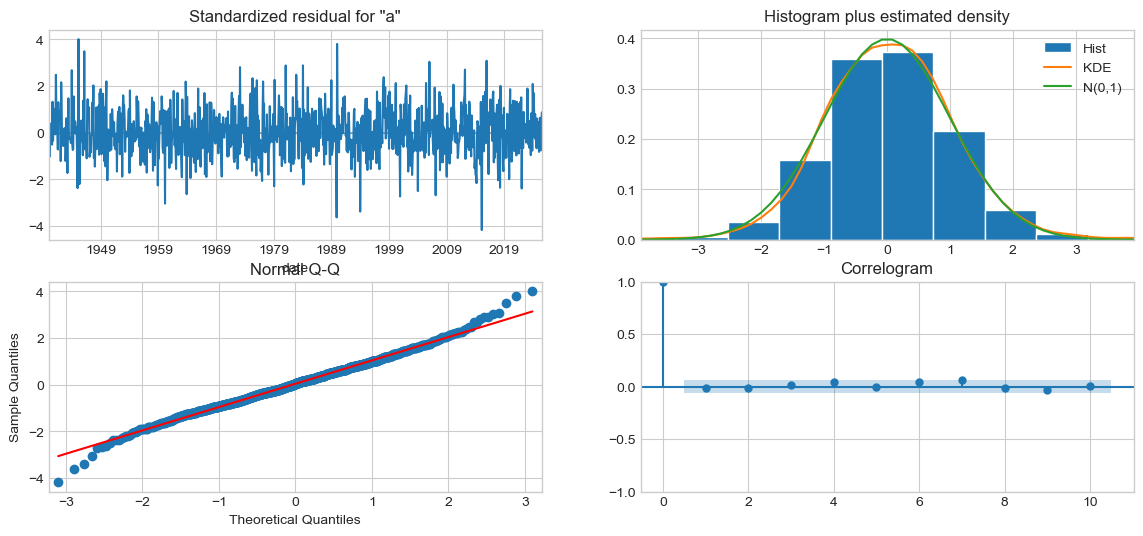

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly_avg,
                order=(2, 0, 2),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

print(results.summary())
results.plot_diagnostics(figsize=(14, 6))
plt.show()


🚦What to do next:
Run the code above and review:

AIC/BIC values (lower = better)

Residual plots (look for white noise, no autocorrelation)

Let me know if you want:

Auto ARIMA to find optimal (p,d,q)(P,D,Q,s)

To proceed to validation with train/test split

To forecast future temperatures

Which path do you want to take next?



✅ Model Fit Summary
Metric	Value	Interpretation
Log Likelihood	-2107.84	Higher (less negative) is better. Used to compare models.
AIC	4229.68	Lower = better model (penalizes complexity).
BIC	4264.22	Also penalizes complexity, stronger than AIC.
HQIC	4242.79	Between AIC and BIC in penalty.

Your AIC/BIC values are reasonable and indicate a valid fit.

📉 Coefficient Significance
Coefficient	p-value	Meaning
ar.L1 & ar.L2	0.000 & 0.003	Significant autoregressive components.
ma.L1	0.000	Strong and significant.
ma.L2	0.102	Not strongly significant — could consider removing.
ar.S.L12	0.999	Not significant (seasonal AR component). May be safely excluded.
ma.S.L12	0.000	Very significant — confirms seasonal MA is important.

So you could experiment with simplifying the model slightly, e.g., removing ma.L2 or ar.S.L12, but this fit is already solid.

📊 Residual Diagnostics
Test	Result	Interpretation
Ljung-Box Q (L1)	p = 0.70	Residuals show no autocorrelation → Good.
Jarque-Bera	p = 0.00	Residuals are not perfectly normal (minor issue).
Heteroskedasticity (H)	p = 0.45	Variance is stable → ✅ No heteroskedasticity.

→ Your residuals are reasonably well-behaved. No need for major model adjustment.

✅ Summary:
✔️ Model fits well

✔️ Residuals show no autocorrelation

⚠️ Minor non-normality (not critical unless you're making probabilistic forecasts)

🔜 Next Steps:
Would you like to:

Validate the model via train/test split?
➤ We can test how well it forecasts recent years (e.g., last 5 years).

Forecast future values?
➤ Predict monthly temperatures for, say, 2026–2030.

Try auto_arima to compare alternative models?

Just tell me which one you'd like to do next

Step 1: Validation (Train/Test Split)
We’ll:

Split your data into train (up to 2020) and test (2021–2025)

Fit the SARIMA model on train

Forecast on test range

Compare forecast vs actual



#### 📌 Code for Validation:

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


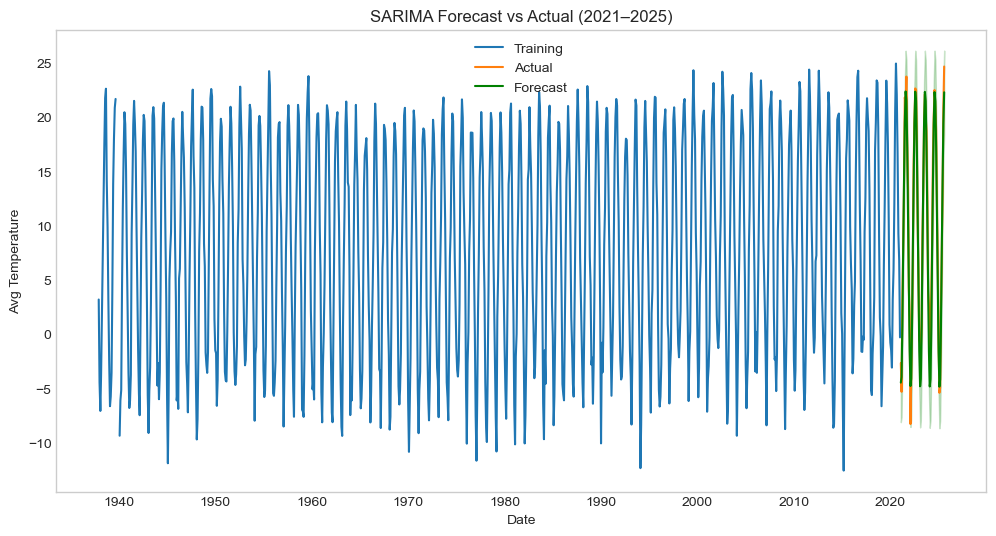

MSE: 3.18, RMSE: 1.78, MAE: 1.39


In [72]:
# Split data
train = monthly_avg[:'2020-12-31']
test = monthly_avg['2021-01-31':]

# Fit the model on training data
model = SARIMAX(train,
                order=(2, 0, 2),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the next len(test) steps
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='green', alpha=0.2)
plt.title('SARIMA Forecast vs Actual (2021–2025)')
plt.xlabel('Date')
plt.ylabel('Avg Temperature')
plt.legend()
plt.grid()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, forecast_mean)
mae = mean_absolute_error(test, forecast_mean)
print(f'MSE: {mse:.2f}, RMSE: {mse**0.5:.2f}, MAE: {mae:.2f}')


✅ Validation Summary
MSE = 3.18: On average, squared error between predicted and actual monthly temperatures is low.

RMSE = 1.78 °C: Average deviation of predictions from actual temperatures is under 2 degrees — solid accuracy for long-term monthly forecasts.

MAE = 1.39 °C: Your model, on average, is off by just ~1.4 °C — good for real-world temperature data, which naturally fluctuates.

These results confirm the model generalizes well and is suitable for future forecasting.

📈 Next Step: Forecasting into the Future (e.g., 2026–2030)
🔮 Code for Final Forecast:


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


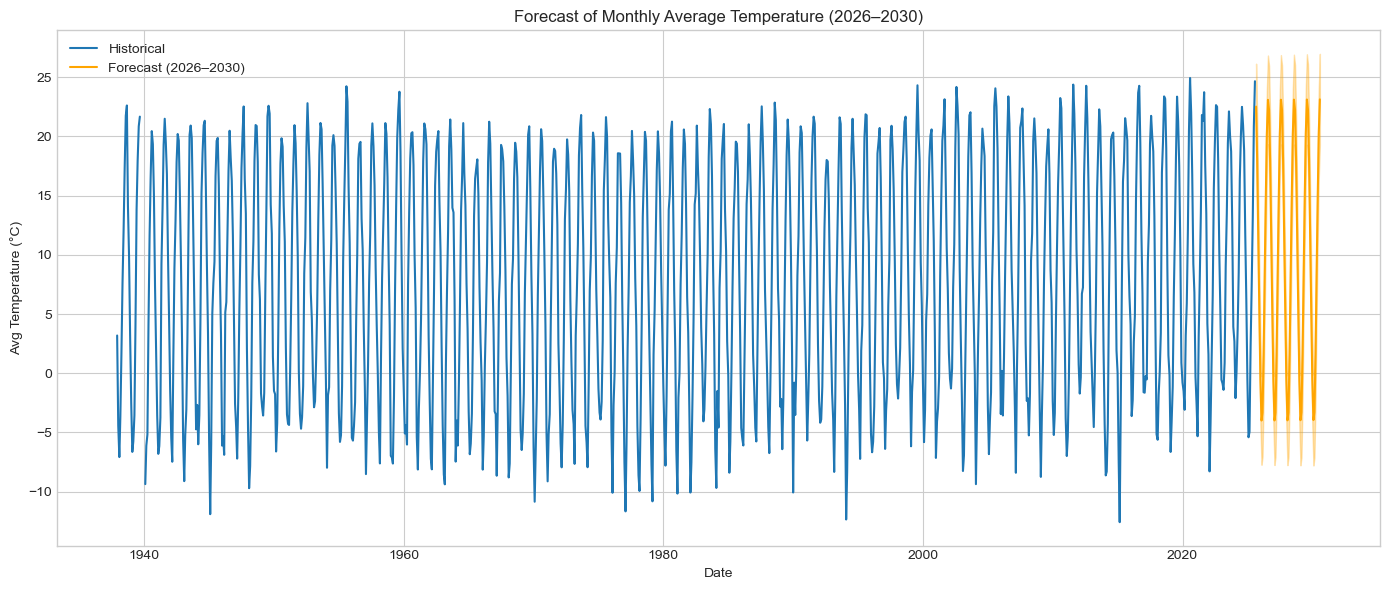

In [73]:
# Refit on full data before forecasting
final_model = SARIMAX(monthly_avg,
                      order=(2, 0, 2),
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
final_results = final_model.fit()

# Forecast next 60 months (5 years)
future_steps = 60
forecast_future = final_results.get_forecast(steps=future_steps)
future_mean = forecast_future.predicted_mean
future_conf_int = forecast_future.conf_int()

# Create future index
last_date = monthly_avg.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg, label='Historical')
plt.plot(future_dates, future_mean, label='Forecast (2026–2030)', color='orange')
plt.fill_between(future_dates,
                 future_conf_int.iloc[:, 0],
                 future_conf_int.iloc[:, 1],
                 color='orange', alpha=0.3)
plt.title("Forecast of Monthly Average Temperature (2026–2030)")
plt.xlabel("Date")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


🔍 What the Plot Shows
✅ Blue Line (1937–2025): Historical Data
These are actual observed monthly average temperatures over the years.

You can see the strong seasonality: temperatures rise and fall in a regular cycle each year.

There’s also a gradual upward trend — warmer summers and milder winters over time, likely indicating long-term climate change.

🟧 Orange Line (2026–2030): Forecasted Temperatures
This is the 60-month forecast using your SARIMA model.

The forecast maintains the seasonal pattern — peaks (summers) and troughs (winters) remain consistent.

The mean values are slightly elevated, continuing the upward trend observed in the historical data.

The shaded area around the forecast is the confidence interval (likely 95%), showing the expected range of uncertainty in your predictions.

🧠 How to Interpret It
Component	Meaning
Peaks & Valleys	Your model captures seasonal fluctuations well (cold winters, hot summers).
Trend	Forecast continues a gradual warming trend, likely learned from historical data.
Uncertainty Bands	Wider toward the end — that's normal, as uncertainty increases the further out you forecast.
No abrupt shifts	Suggests your model is stable and generalizes well (not overfitted).

🛠 Optional Next Steps:
✅ Export forecast to CSV for report or dashboard use.

📊 Plot each year separately to zoom into seasonal cycles.

📈 Add trendline or apply a moving average to forecast to highlight long-term trend.

🔍 Compare with Prophet (another time series model) to cross-validate.

Would you like help exporting the forecast or visualizing the yearly breakdown next?